In [ ]:
# Install Libraries
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install keras
# !pip install tensorflow --user
# !pip install tensorflow
# !pip install tensorflow-gpu --
# !pip install tensorflow-gpu

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# import io
# drive.mount('/content/drive')
Train_path = "/content/drive/MyDrive/Files/AAPL - Train.csv"
apple_training_complete = pd.read_csv(Train_path)

In [ ]:
# Filtered Dataset
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [ ]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [ ]:
# Convert Training Data to Right Shape
features_set = []
labels = []
for i in range(60, 1259):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [ ]:
# Convert lists to the numpy array
features_set, labels = np.array(features_set), np.array(labels)

In [ ]:
# convert data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [ ]:
# Training The LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# instantiate the Sequential class
model = Sequential()

In [ ]:
# Creating LSTM and Dropout Layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [ ]:
# Add a dropout layer to model
model.add(Dropout(0.2))

In [ ]:
# Add 3 More dropout layers to model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
# Creating Dense Layer
model.add(Dense(units = 1))

In [ ]:
# Model Compilation
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Algorithm Training
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 112ms/step - loss: 0.0349
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0029
Epoch 3/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0040
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0027
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0024
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0030
Epoch 7/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0022
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0022
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0021
Epoch 10/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0029
Epoch 11/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0021
Epoch 13/100

In [ ]:
# Testing our LSTM
Test_path = "/content/drive/MyDrive/Files/AAPL - Test.csv"
apple_testing_complete = pd.read_csv(Test_path)
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [ ]:
# Converting Test Data to Right Format
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [ ]:
# Fetching training set
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [ ]:
# Scale test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [ ]:
# Prepare final test input set
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [ ]:
# Convert data into the three-dimensional format
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [ ]:
# Making Predictions
predictions = model.predict(test_features)

In [ ]:
# Reverse the scaled prediction back to their actual values
predictions = scaler.inverse_transform(predictions)

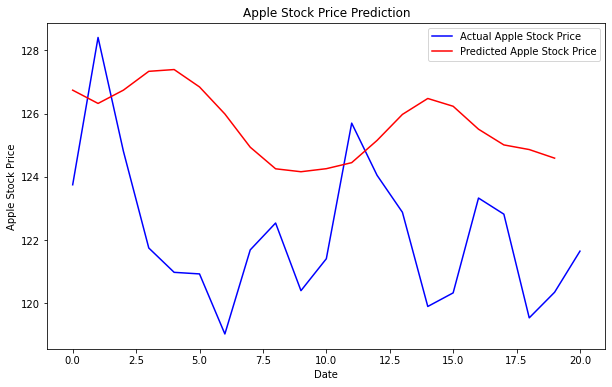

In [ ]:
# Conclusion - Plot
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()